# Web Scraping Supermarkets Analysis (Group Work)
---

In [33]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'ace_tools'

The first step is to merge the three different CSV files provided by each group member.

In [7]:
# Extract columns of interest for each csv
columns_interest = [
    'ID', 'Competitor', 'Category', 'Product_Description', 'Brand', 
    'Regular_Price (CHF)', 'Grammage', 'Unit', 'Link', 'Scraping_Date', 
    'Discount', 'Actual_Price (CHF)', 'Regular_Price/Unit', 'Actual_Price/Unit']

# Load each CSV file
df1 = pd.read_csv('Final_Scraping_Merged_Pasta.csv', usecols = columns_interest, encoding='utf-8') # Catalina Roth DF
df2 = pd.read_csv('pasta_sauces_merged.csv', usecols = columns_interest, encoding='utf-8') # Martina Diaz DF
df3 = pd.read_csv('RiceData_Cleaned_Transformed_GroupProject.csv', usecols = columns_interest, encoding='utf-8') #Fatima Barcina DF

# Concatenate the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

# Visualize Dtype
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   297 non-null    int64  
 1   Competitor           297 non-null    object 
 2   Category             297 non-null    object 
 3   Product_Description  297 non-null    object 
 4   Brand                297 non-null    object 
 5   Regular_Price (CHF)  297 non-null    float64
 6   Grammage             297 non-null    float64
 7   Unit                 297 non-null    object 
 8   Link                 297 non-null    object 
 9   Scraping_Date        297 non-null    object 
 10  Discount             297 non-null    object 
 11  Actual_Price (CHF)   297 non-null    float64
 12  Regular_Price/Unit   297 non-null    float64
 13  Actual_Price/Unit    297 non-null    float64
dtypes: float64(5), int64(1), object(8)
memory usage: 32.6+ KB


,ID,Competitor,Category,Product_Description,Brand,Regular_Price (CHF),Grammage,Unit,Link,Scraping_Date,Discount,Actual_Price (CHF),Regular_Price/Unit,Actual_Price/Unit
0,1,Migros,Pasta,Agnesi lasagne with eggs,Agnesi,3.95,0.50,kg,https://www.migros.ch/en/product/104066400000,19/10/2024,no discount,3.95,7.9,7.9
1,2,Migros,Pasta,M-Classic tortellini with raw ham,M-Classic,2.50,0.25,kg,https://www.migros.ch/en/product/104075000000,19/10/2024,12%,2.20,10.0,8.8
2,3,Migros,Pasta,M-Classic älplermagronen with eggs,M-Classic,1.90,0.50,kg,https://www.migros.ch/en/product/104074500000,19/10/2024,16%,1.60,3.8,3.2
3,4,Migros,Pasta,Garofalo orecchiette,Garofalo,2.95,0.50,kg,https://www.migros.ch/en/product/104126400000,19/10/2024,no discount,2.95,5.9,5.9
4,5,Migros,Pasta,Garofalo rigatoni,Garofalo,2.95,0.50,kg,https://www.migros.ch/en/product/104125200000,19/10/2024,no discount,2.95,5.9,5.9


## Exploratory Data Analysis

### 1) Summary Statistics

In [9]:
def summary_statistics(df):
    
    # Select only numeric columns for summary statistics
    cols = df.select_dtypes(include='number')
    
    # Calculate statistics
    stats = pd.DataFrame({
        'Mean': round(cols.mean(), 2),
        'Median': round(cols.median(), 2),
        'Mode': round(cols.mode().iloc[0], 2),
        'Min': round(cols.min(), 2),
        'Max': round(cols.max(), 2)
    })
    
    return stats

# Call the function and display the summary statistics
summary_stats = summary_statistics(df)
print(summary_stats)

                      Mean  Median  Mode   Min     Max
ID                   50.81   47.00  1.00  0.00  136.00
Regular_Price (CHF)   3.14    2.99  2.95  0.39   10.90
Grammage              0.50    0.50  0.50  0.02    4.40
Actual_Price (CHF)    3.10    2.95  2.95  0.39   10.90
Regular_Price/Unit   10.06    7.00  5.90  1.19   86.36
Actual_Price/Unit     9.96    6.90  5.90  1.19   86.36


### 2) Boxplots

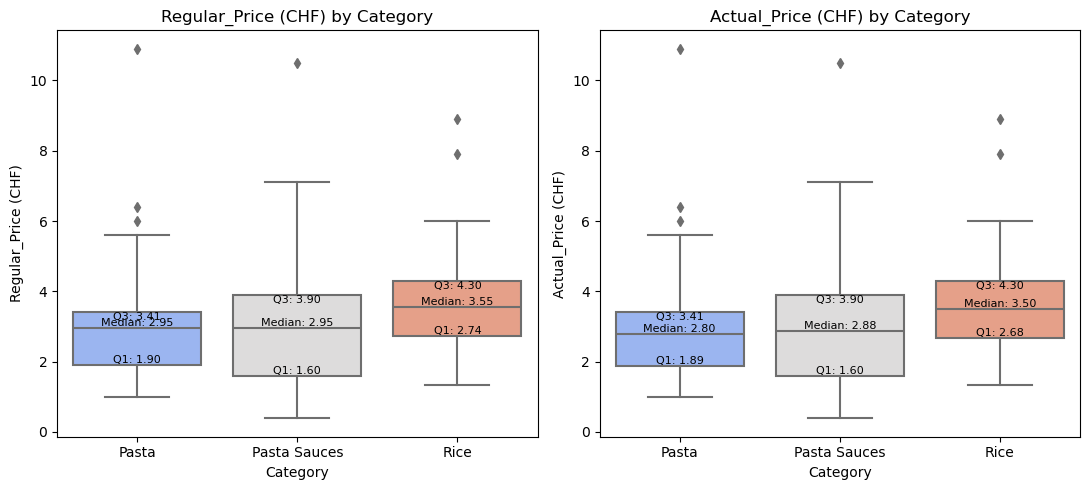

In [12]:
# Define your variables to avoid conflict with the built-in 'vars'
variables = ['Regular_Price (CHF)', 'Actual_Price (CHF)']  # Adjust to your actual column names

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(11, 5))  # boxplot size

# Plot a boxplot for each variable, grouped by category
for i, var in enumerate(variables):
    sns.boxplot(data=df, x='Category', y=var, ax=axes[i], palette='coolwarm')
    axes[i].set_title(f'{var} by Category')
    axes[i].set_ylabel(var)
    
    # Calculate median and IQR
    for category in df['Category'].unique():
        category_data = df[df['Category'] == category][var].dropna()
        median = category_data.median()
        q1 = category_data.quantile(0.25)
        q3 = category_data.quantile(0.75)
        
        # Get position for annotation
        pos = df['Category'].unique().tolist().index(category)
        
        # Annotate median and IQR
        axes[i].text(pos, median, f'Median: {median:.2f}', ha='center', va='bottom', fontsize=8, color='black')
        axes[i].text(pos, q1, f'Q1: {q1:.2f}', ha='center', va='bottom', fontsize=8, color='black')
        axes[i].text(pos, q3, f'Q3: {q3:.2f}', ha='center', va='top', fontsize=8, color='black')
    
# Prevent Overlap
plt.tight_layout()

# Add Title
# plt.suptitle('Boxplots for Prices per Category', fontsize=14, y=1.05)

# Display plot
plt.show()


## Results

### 1) Plot for the Gap Price between Private Label and Third Brand

A Column named " Private Label Product" is created in order to compare its price with third brands.

In [15]:
# Defining Private Labels for Lidl and Migros
private_label_migros = ["M-Classic",
    "Migros Bio",
    "Aha!",
    "SÉlection",
    "M-Budget",
    "V-Love",
    "Aus der Region"]

private_label_lidl = ["Combino",
    "Italiamo",
    "Golden Sun",
    "Baresa",
    "Kania",
    "Freshona",
    "Vemondo",
    "Deluxe"]

# Function to create private label flag
def private_label(df):
    df['Private_Label_Product'] = df['Brand'].apply(lambda x: 'Yes' if x in private_label_migros or x in private_label_lidl else 'No')
    return df['Private_Label_Product']

# Calling the Function private_label
df_private_label = df.copy()
df_private_label['Private_Label_Product'] = private_label(df_private_label)

# Save to CSV
#df1 = df_private_label.to_csv(f"~/Desktop/Private_Label.csv", index = False)


In [49]:
# Group by Competitor, Category, and Private_Label_Product to count the occurrences
private_label_counts = df_private_label.groupby(['Competitor', 'Category', 'Private_Label_Product']).size().reset_index(name='Count') #Add Count Column
#print(private_label_counts)

# Pivot the table to make 'Yes' and 'No' counts as separate columns
pivot_table = private_label_counts.pivot_table(index=['Competitor', 'Category'], columns='Private_Label_Product', values='Count', fill_value=0)
#print(pivot_table) #Yes/no becomes columns

# Rename columns for clarity
pivot_table.columns = ['No', 'Yes']
pivot_table = pivot_table.reset_index() # turnes Competitor and Category from index levels into regular columns.

print(pivot_table)



  Competitor      Category    No   Yes
0       Lidl         Pasta   6.0  21.0
1       Lidl          Rice   3.0   7.0
2     Migros         Pasta  60.0  21.0
3     Migros  Pasta Sauces  75.0  10.0
4     Migros          Rice  50.0  16.0
5       lidl  Pasta Sauces   5.0  23.0
